In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.datasets import make_classification
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
combined_data = pd.read_csv('Data/combined_data_preprocessed.csv')

In [3]:
df = combined_data

# Feature Engineering: Calculate Average Rating, Review Count per Course
course_stats = df.groupby('course_id').agg(
    avg_rating=('rating', 'mean'),
    review_count=('rating', 'count')
).reset_index()

# Merge back into original dataframe
df = df.merge(course_stats, on='course_id', how='left')

# 5. Normalize Rating and Review Count
scaler = StandardScaler()
df[['normalized_rating', 'normalized_review_count']] = scaler.fit_transform(
    df[['avg_rating', 'review_count']]
)

In [4]:
df.head()

,name,institution,course_url,course_id,reviews,reviewers,date_reviews,rating,cleaned_reviews,avg_rating,review_count,normalized_rating,normalized_review_count
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This is an extremely basic course. Machine lea...,By Deleted A,2017-03-18,1,extremely basic course machine learning built ...,4.750522,35895,0.277835,2.014232
1,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,The course is ok but the certification procedu...,By Bruno C,2015-11-09,1,course ok certification procedure messno state...,4.750522,35895,0.277835,2.014232
2,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"I just started week 3 , I have to admit that I...",By Fadi,2019-04-15,1,started week admit good course explaining idea...,4.750522,35895,0.277835,2.014232
3,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This course is absolute garbage. You get no f...,By Mathew L,2015-09-25,1,course absolute garbage get feedback quiz assi...,4.750522,35895,0.277835,2.014232
4,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"However good the material and lectures may be,...",By Rui C,2015-12-12,1,however good material lecture may use outdated...,4.750522,35895,0.277835,2.014232


In [ ]:
# data = df

# # Ensure cleaned_reviews is treated as strings and handle NaN
# data['cleaned_reviews'] = data['cleaned_reviews'].fillna('').astype(str)

# # Initialize VADER Sentiment Analyzer
# analyzer = SentimentIntensityAnalyzer()

# # Apply sentiment analysis to your reviews
# data['sentiment_score'] = data['cleaned_reviews'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# # Classify sentiment as positive (1), neutral (0), or negative (-1)
# data['predicted_sentiment'] = data['sentiment_score'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

In [ ]:
# data.head()

,name,institution,course_url,course_id,reviews,reviewers,date_reviews,rating,cleaned_reviews,avg_rating,review_count,normalized_rating,normalized_review_count,sentiment_score,predicted_sentiment
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This is an extremely basic course. Machine lea...,By Deleted A,2017-03-18,1,extremely basic course machine learning built ...,4.750522,35895,0.277835,2.014232,-0.1590,-1
1,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,The course is ok but the certification procedu...,By Bruno C,2015-11-09,1,course ok certification procedure messno state...,4.750522,35895,0.277835,2.014232,0.3612,1
2,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"I just started week 3 , I have to admit that I...",By Fadi,2019-04-15,1,started week admit good course explaining idea...,4.750522,35895,0.277835,2.014232,0.8360,1
3,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This course is absolute garbage. You get no f...,By Mathew L,2015-09-25,1,course absolute garbage get feedback quiz assi...,4.750522,35895,0.277835,2.014232,-0.4936,-1
4,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"However good the material and lectures may be,...",By Rui C,2015-12-12,1,however good material lecture may use outdated...,4.750522,35895,0.277835,2.014232,0.5859,1


In [ ]:
# output_path = "Data/combined_data_with_sentiment.csv"
# data.to_csv(output_path, index=False)

/Users/rahulgupta/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


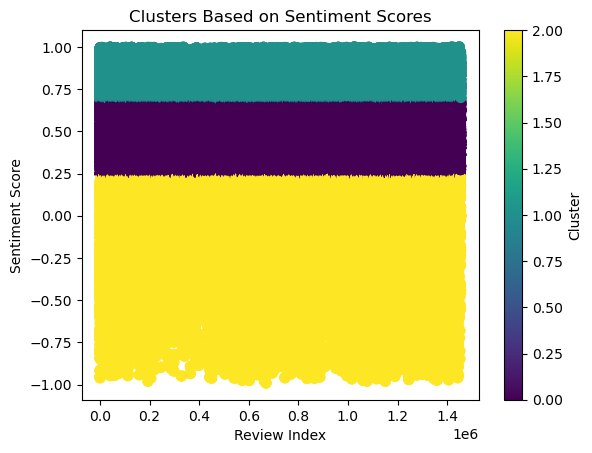

In [ ]:
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import MinMaxScaler
# import matplotlib.pyplot as plt

# # Load the data
# data = pd.read_csv('Data/combined_data_with_sentiment.csv')

# # Normalize the sentiment scores
# scaler = MinMaxScaler()
# data['normalized_sentiment'] = scaler.fit_transform(data[['sentiment_score']])

# # Cluster based on normalized sentiment scores
# n_clusters = 3  # Specify number of clusters (negative, neutral, positive)
# kmeans = KMeans(n_clusters=n_clusters, random_state=42)
# data['cluster'] = kmeans.fit_predict(data[['normalized_sentiment']])

# # Assign cluster labels
# cluster_sentiment_mapping = {
#     data[data['normalized_sentiment'] == data['normalized_sentiment'].min()]['cluster'].values[0]: 'negative',
#     data[data['normalized_sentiment'] == data['normalized_sentiment'].median()]['cluster'].values[0]: 'neutral',
#     data[data['normalized_sentiment'] == data['normalized_sentiment'].max()]['cluster'].values[0]: 'positive',
# }
# data['predicted_sentiment'] = data['cluster'].map(cluster_sentiment_mapping)

# # Visualize clusters
# plt.scatter(data.index, data['sentiment_score'], c=data['cluster'], cmap='viridis', s=50)
# plt.xlabel('Review Index')
# plt.ylabel('Sentiment Score')
# plt.title('Clusters Based on Sentiment Scores')
# plt.colorbar(label='Cluster')
# plt.show()

In [ ]:
# # Cluster statistics
# cluster_stats = data.groupby('cluster').agg(
#     num_reviews=('reviews', 'count'),
#     avg_sentiment=('sentiment_score', 'mean'),
#     min_sentiment=('sentiment_score', 'min'),
#     max_sentiment=('sentiment_score', 'max')
# )

# print("\nCluster Statistics:")
# print(cluster_stats)

# # Detailed review samples by cluster
# for cluster in sorted(data['cluster'].unique()):
#     print(f"\n--- Cluster {cluster} ({cluster_sentiment_mapping[cluster]}) ---")
    
#     # Show summary stats for this cluster
#     num_reviews = cluster_stats.loc[cluster, 'num_reviews']
#     avg_sentiment = cluster_stats.loc[cluster, 'avg_sentiment']
#     print(f"Number of Reviews: {num_reviews}")
#     print(f"Average Sentiment Score: {avg_sentiment:.2f}")
    
#     # Display a sample of reviews for this cluster
#     sample_reviews = data[data['cluster'] == cluster]['reviews'].head(10)
#     print("Sample Reviews:")
#     for i, review in enumerate(sample_reviews, start=1):
#         print(f"{i}. {review}")


Cluster Statistics:
         num_reviews  avg_sentiment  min_sentiment  max_sentiment
cluster                                                          
0             572194       0.511685         0.2330         0.6745
1             595844       0.837498         0.6747         0.9999
2             286533      -0.046076        -0.9906         0.2323

--- Cluster 0 (neutral) ---
Number of Reviews: 572194
Average Sentiment Score: 0.51
Sample Reviews:
1. The course is ok but the certification procedure is a mess!No statement of accomplishment and you have to retake all the assignments if you want the certificate and had not been verified .... 
2. However good the material and lectures may be, the use of an outdated version of Octave (which is not Mac-friendly and exceedingly brittle, to the extent where the supplied code requires manual patching in Windows and Linux) is a complete turn-off and makes it nearly impossible to complete the assignments on time unless you're prepared to spend at

In [7]:
data = pd.read_csv('Data/combined_data_preprocessed.csv')

# Combine course titles and reviews
data['combined_text'] = data['name'] + " " + data['cleaned_reviews']

In [8]:
# Replace NaN values in combined_text with an empty string
data['combined_text'] = data['combined_text'].fillna("")